In [1]:
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tqdm
import copy
from util import *

In [2]:
with open("result/c2st_HDGM_baseline_result.pkl", "rb") as f:
    baseline_result = pickle.load(f)

In [3]:
baseline_result = np.array(baseline_result)
np.mean(baseline_result, axis=1)

array([0.13, 0.02, 0.27, 0.43, 0.6 , 0.91, 0.97, 1.  , 1.  ])

In [4]:
with open("result/c2st_HDGM_semi_baseline_result.pkl", "rb") as f:
    semi_baseline_result = pickle.load(f)

In [5]:
semi_baseline_result = np.array(semi_baseline_result)
np.mean(semi_baseline_result, axis=1)

array([0.04, 0.33, 0.44, 0.55, 0.76, 0.94, 0.98, 0.97, 1.  ])

In [3]:
with open("result/unfreeze_c2st_HDGM_semi_1024_0.005_2000_unschedule.pkl", "rb") as f:
    unfreeze_result = pickle.load(f)
np.mean(unfreeze_result, axis=1)

array([0.09, 0.21, 0.85, 0.95, 1.  , 1.  ])

In [4]:
with open("result/mmd-d_HDGM_baseline_0.00005_revised.pkl", "rb") as f:
    mmd_d_baseline_result = pickle.load(f)
np.mean(mmd_d_baseline_result, axis=1)

array([0.0557, 0.0852, 0.1523, 0.2353, 0.6681, 0.8613])

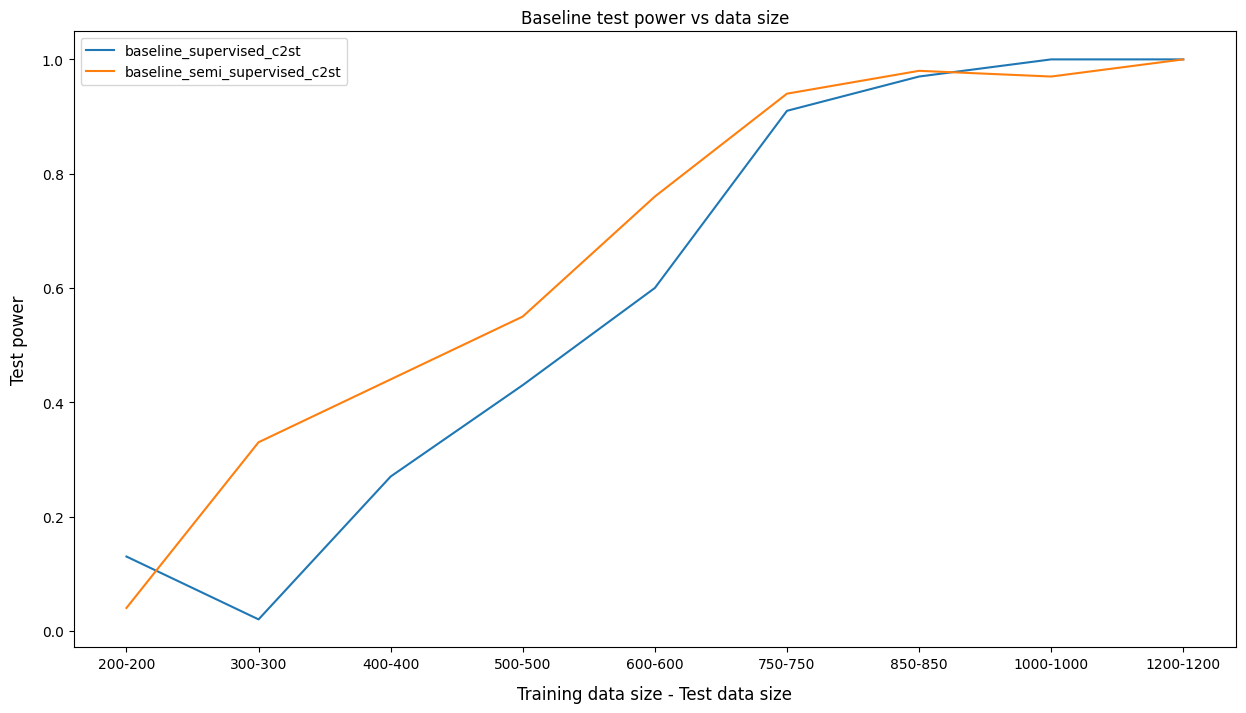

In [9]:
x = np.array(["200-200", "300-300", "400-400",
             "500-500", "600-600", "750-750", "850-850",
             "1000-1000", "1200-1200"])

plt.figure(figsize=(15, 8))
plt.plot(x, np.mean(baseline_result, axis=1), label="baseline_supervised_c2st")
plt.plot(x, np.mean(semi_baseline_result, axis=1),
         label="baseline_semi_supervised_c2st")
plt.xlabel("Training data size - Test data size", fontsize=12, labelpad=10)
plt.ylabel("Test power", fontsize=12, labelpad=10)
plt.title("Baseline test power vs data size")
plt.legend()

plt.savefig("figure/HDGM_baseline_test_power.png", bbox_inches='tight')
plt.show()

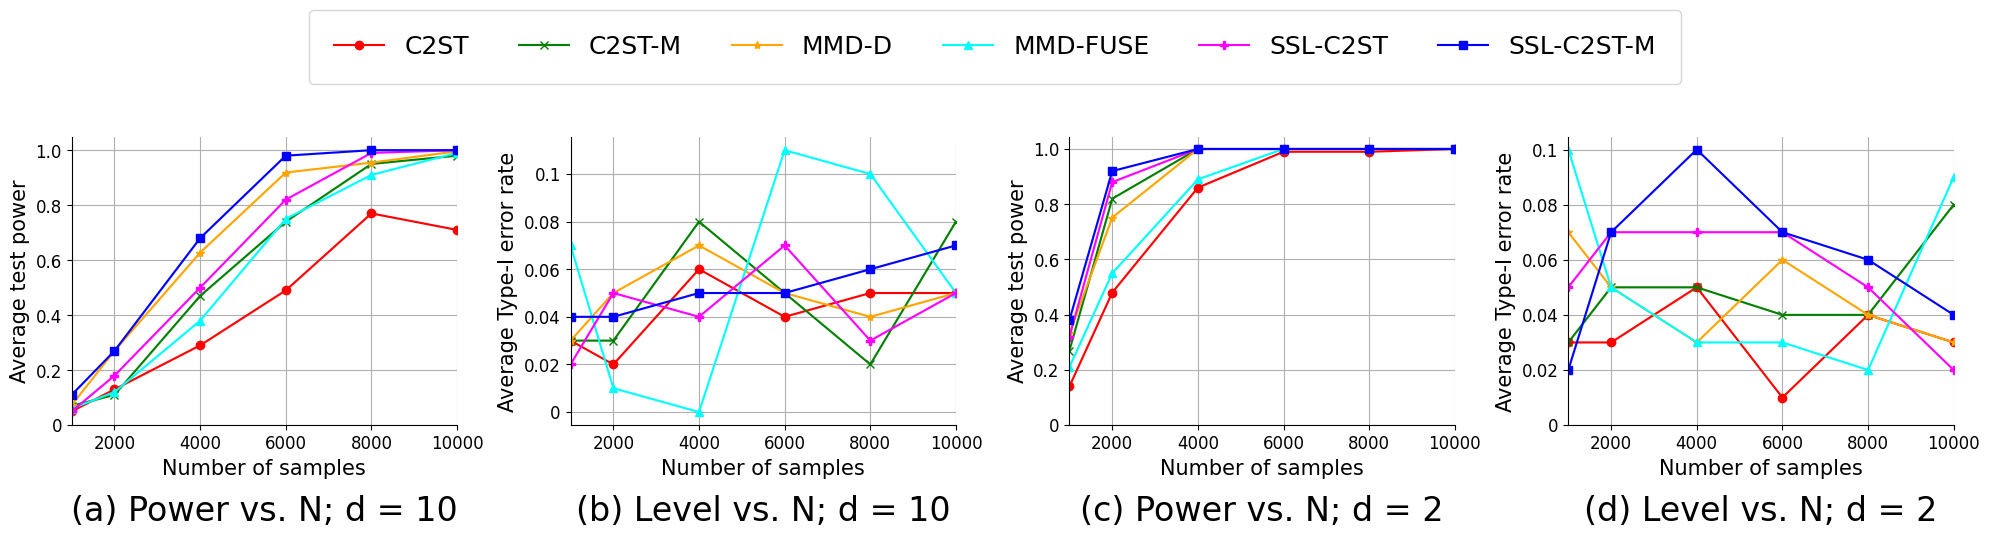

In [26]:
# Re-creating the sample data since the execution state was reset
N_samples_b = np.array([1000, 2000, 4000, 6000, 8000, 10000])
power_a = {
    'C2ST': np.array([0.05, 0.13, 0.29, 0.49, 0.77, 0.71]),
    'C2ST-M': np.array([0.07, 0.11, 0.47, 0.74, 0.95, 0.98]),
    'MMD-D': np.array([0.0727, 0.2702, 0.6274, 0.9187, 0.9547, 0.9959]),
    'MMD-FUSE': np.array([0.06, 0.12, 0.38, 0.75, 0.91, 0.99]), 
    'SSL-C2ST': np.array([0.05, 0.18, 0.50, 0.82, 0.99, 1.  ]),
    'SSL-C2ST-M': np.array([0.11, 0.27, 0.68, 0.98, 1.  , 1.  ]),
}

level_b = {
    'C2ST': np.array([0.03, 0.02, 0.06, 0.04, 0.05, 0.05]),
    'C2ST-M': np.array([0.03, 0.03, 0.08, 0.05, 0.02, 0.08]),
    'MMD-D': np.array([0.03, 0.05, 0.07, 0.05, 0.04, 0.05]),
    'MMD-FUSE': np.array([0.07, 0.01, 0.0, 0.11, 0.1, 0.05]),
    'SSL-C2ST': np.array([0.02, 0.05, 0.04, 0.07, 0.03, 0.05]),
    'SSL-C2ST-M': np.array([0.04, 0.04, 0.05, 0.05, 0.06, 0.07]),
}

power_c = {
    'C2ST': np.array([0.14, 0.48, 0.86, 0.99, 0.99, 1.0]),
    'C2ST-M': np.array([0.27, 0.82, 1.0, 1.0, 1.0, 1.0]),
    'MMD-D': np.array([0.332, 0.7515, 1.0, 1.0, 1.0, 1.0]),
    'MMD-FUSE': np.array([0.21, 0.55, 0.89, 1.0, 1.0, 1.0]), 
    'SSL-C2ST': np.array([0.32, 0.88, 1.  , 1.  , 1.  , 1.  ]),
    'SSL-C2ST-M': np.array([0.38, 0.92, 1.0, 1.0, 1.0, 1.0]),
}

level_d = {
    'C2ST': np.array([0.03, 0.03, 0.05, 0.01, 0.04, 0.03]),
    'C2ST-M': np.array([0.03, 0.05, 0.05, 0.04, 0.04, 0.08]),
    'MMD-D': np.array([0.07, 0.05, 0.03, 0.06, 0.04, 0.03]),
    'MMD-FUSE': np.array([0.1, 0.05, 0.03, 0.03, 0.02, 0.09]),
    'SSL-C2ST': np.array([0.05, 0.07, 0.07, 0.07, 0.05, 0.02]),
    'SSL-C2ST-M': np.array([0.02, 0.07, 0.1,  0.07, 0.06, 0.04]),
}

# Define the colors and markers for each line
colors = ['red', 'green', 'orange', 'cyan', 'magenta', "blue"]
markers = ['o', 'x', '*', '^', 'P', 's']
labels = ['C2ST', 'C2ST-M', 'MMD-D', 'MMD-FUSE', 'SSL-C2ST', 'SSL-C2ST-M']
# labels = ['C2ST-S', 'C2ST-L', 'MMD-D', 'MMD-FUSE', 'SSL-C2ST-M']


# Plotting graph (b) and (c) with a shared legend box horizontally on the middle top of the two graphs
fig, (ax1, ax3, ax2, ax4) = plt.subplots(1, 4, figsize=(20, 5))
# set a grid background to the plot

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plotting graph (b) Power vs. N; d = 10 on the first subplot
for i, label in enumerate(labels):
    ax1.plot(N_samples_b, power_a[label], label=label, color=colors[i], marker=markers[i])
    ax1.fill_between(N_samples_b, power_a[label], power_a[label], color=colors[i], alpha=0.1)

ax1.grid(True)
ax1_txt = '(a) Power vs. N; d = 10'
ax1.text(0.5, -0.3, ax1_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, fontsize=24)
ax1.set_xlabel('Number of samples', fontsize=15)
ax1.set_ylabel('Average test power', fontsize=15)
# Set custom ticks for the x-axis
ax1.margins(x=0)
ax1.set_xticks(N_samples_b[1:])
ax1.set_xticklabels(N_samples_b[1:], fontsize=12)
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
ax1.spines[['right', 'top']].set_visible(False)

# # Plotting graph (c) Level vs. N; d = 10 on the second subplot
for i, label in enumerate(labels):
    ax3.plot(N_samples_b, level_b[label], label=label, color=colors[i], marker=markers[i])
    ax3.fill_between(N_samples_b, level_b[label], level_b[label], color=colors[i], alpha=0.1)

ax3.grid(True)
ax3_txt = '(b) Level vs. N; d = 10'
ax3.text(0.5, -0.3, ax3_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax3.transAxes, fontsize=24)
ax3.set_xlabel('Number of samples', fontsize=15)
ax3.set_ylabel('Average Type-I error rate', fontsize=15)
# # Set custom ticks for the x-axis
ax3.margins(x=0)
ax3.set_xticks(N_samples_b[1:])
ax3.set_xticklabels(N_samples_b[1:], fontsize=12)
ax3.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10])
ax3.set_yticklabels([0, 0.02, 0.04, 0.06, 0.08, 0.10], fontsize=12)
ax3.spines[['right', 'top']].set_visible(False)

# Plotting graph (c) Level vs. N; d = 10 on the second subplot
for i, label in enumerate(labels):
    ax2.plot(N_samples_b, power_c[label], label=label, color=colors[i], marker=markers[i])
    ax2.fill_between(N_samples_b, power_c[label], power_c[label], color=colors[i], alpha=0.1)    

ax2.grid(True)
ax2_txt = '(c) Power vs. N; d = 2'
ax2.text(0.5, -0.3, ax2_txt, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=24)
ax2.set_xlabel('Number of samples', fontsize=15)
ax2.set_ylabel('Average test power', fontsize=15)
# Set custom ticks for the x-axis
ax2.margins(x=0)
ax2.set_xticks(N_samples_b[1:])
ax2.set_xticklabels(N_samples_b[1:], fontsize=12)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
ax2.spines[['right', 'top']].set_visible(False)

for i, label in enumerate(labels):
    ax4.plot(N_samples_b, level_d[label], label=label, color=colors[i], marker=markers[i])
    ax4.fill_between(N_samples_b, level_d[label], level_d[label], color=colors[i], alpha=0.1)

ax4.grid(True)
ax4_txt = '(d) Level vs. N; d = 2'
ax4.text(0.5, -0.3, ax4_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax4.transAxes, fontsize=24)
ax4.set_xlabel('Number of samples', fontsize=15)
ax4.set_ylabel('Average Type-I error rate', fontsize=15)
# # Set custom ticks for the x-axis
ax4.margins(x=0)
ax4.set_xticks(N_samples_b[1:])
ax4.set_xticklabels(N_samples_b[1:], fontsize=12)
ax4.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10])
ax4.set_yticklabels([0, 0.02, 0.04, 0.06, 0.08, 0.10], fontsize=12)
ax4.spines[['right', 'top']].set_visible(False)

# Adjust layout to make room for the shared legend box
fig.tight_layout(rect=[0, 0, 1, 0.9])

# Place a legend at the middle top of the two subplots.
# fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(labels))

# fig.legend(loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1))
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(
    0.5, 1.15), ncol=len(labels), borderpad=1, fontsize=18)
plt.savefig("test1.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [25]:
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right')

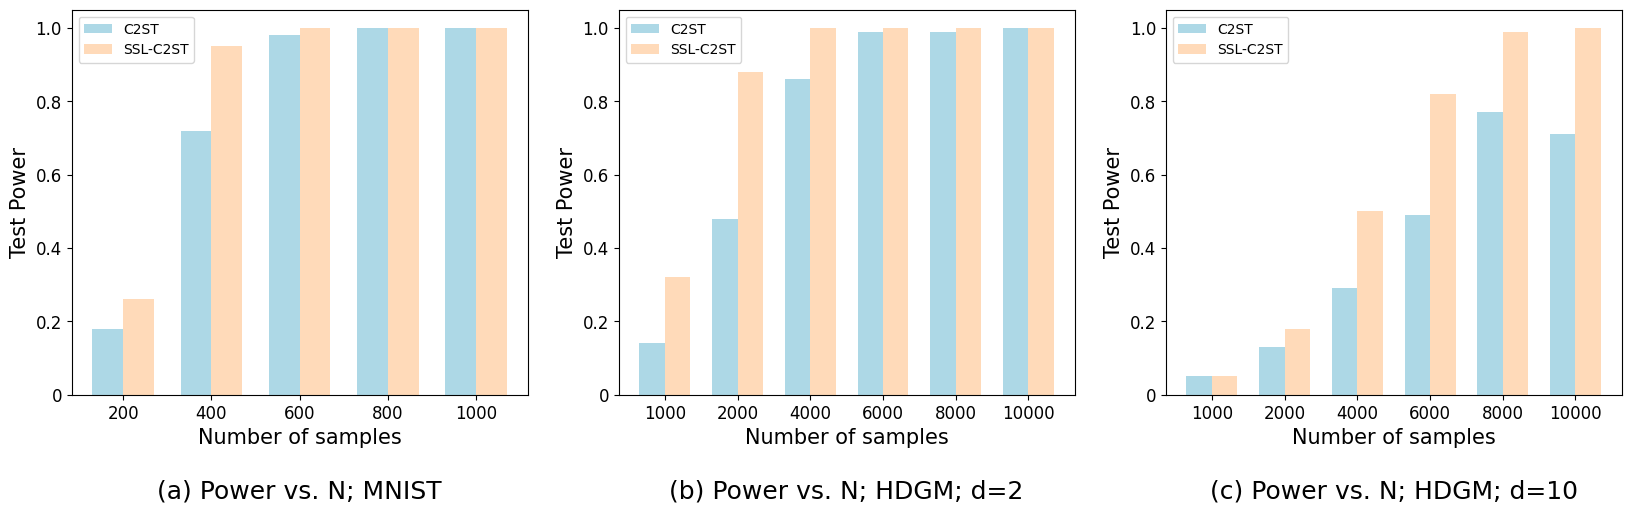

In [43]:
# Adjusting the plot to visually compare X and Y values more easily

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Width of the bars (could be adjusted for better visual representation)
bar_width = 0.35
bar_labels = ["200", "400", "600", "800", "1000"]
# Indices for the bar positions
indices = range(len(bar_labels))

x_data = [0.18, 0.72, 0.98, 1, 1]
y_data = [0.26, 0.95, 1, 1, 1]

# Plotting both 'X' and 'Y' values next to each other for each label, but now in a vertical orientation
ax1.bar([i - bar_width/2 for i in indices], x_data, bar_width, color='lightblue', label='X')
ax1.bar([i + bar_width/2 for i in indices], y_data, bar_width, color='peachpuff', label='Y')

# ax1.grid(True)
ax1_txt = '(a) Power vs. N; MNIST'
ax1.text(0.5, -0.25, ax1_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, fontsize=18)
# Set labels and title
ax1.set_xticks(indices)
ax1.set_xticklabels(bar_labels, fontsize=12)
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
ax1.set_xlabel('Number of samples', fontsize=15)
ax1.set_ylabel('Test Power', fontsize=15)
# ax.set_title('Vertical Bar Plot Comparing X and Y with Lighter Colors')
ax1.legend(['C2ST', 'SSL-C2ST'])

bar_labels = ["1000", "2000", "4000", "6000", "8000", "10000"]
# Indices for the bar positions
indices = range(len(bar_labels))

x_data = [0.14, 0.48, 0.86, 0.99, 0.99, 1.0]
y_data = [0.32, 0.88, 1.  , 1.  , 1.  , 1.  ]

# Plotting both 'X' and 'Y' values next to each other for each label, but now in a vertical orientation
ax2.bar([i - bar_width/2 for i in indices], x_data, bar_width, color='lightblue', label='X')
ax2.bar([i + bar_width/2 for i in indices], y_data, bar_width, color='peachpuff', label='Y')

ax2_txt = '(b) Power vs. N; HDGM; d=2'
ax2.text(0.5, -0.25, ax2_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax2.transAxes, fontsize=18)
# Set labels and title
ax2.set_xticks(indices)
ax2.set_xticklabels(bar_labels, fontsize=12)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
ax2.set_xlabel('Number of samples', fontsize=15)
ax2.set_ylabel('Test Power', fontsize=15)

ax2.legend(['C2ST', 'SSL-C2ST'])

x_data = [0.05, 0.13, 0.29, 0.49, 0.77, 0.71]
y_data = [0.05, 0.18, 0.50, 0.82, 0.99, 1.  ]

# Plotting both 'X' and 'Y' values next to each other for each label, but now in a vertical orientation
ax3.bar([i - bar_width/2 for i in indices], x_data, bar_width, color='lightblue', label='X')
ax3.bar([i + bar_width/2 for i in indices], y_data, bar_width, color='peachpuff', label='Y')

ax3_txt = '(c) Power vs. N; HDGM; d=10'
ax3.text(0.5, -0.25, ax3_txt, horizontalalignment='center',
         verticalalignment='center', transform=ax3.transAxes, fontsize=18)
# Set labels and title
ax3.set_xticks(indices)
ax3.set_xticklabels(bar_labels, fontsize=12)
ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax3.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
ax3.set_xlabel('Number of samples', fontsize=15)
ax3.set_ylabel('Test Power', fontsize=15)

ax3.legend(['C2ST', 'SSL-C2ST'])

plt.savefig("barplot_c2st_ssl.pdf", format="pdf", bbox_inches="tight")

plt.show()